# <span style ='color:Green'> Data Mining Experiential Learning  </span>

# <span style ='color:Blue'> Tejas Kumar PRN: 22030242055 </span>

# <span style ='color:Red'> Problem_1 </span> 

In [2]:
import numpy as np  
import pandas as pd  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
df = pd.read_csv("C:/Test_route/Classification_Loan_Data.csv")

In [4]:
df.head()

ID  Income_of_Applicant  Income_of_Joint_Applicant  \
0   1                 5849                        0.0   
1   2                 4583                     1508.0   
2   3                 3000                        0.0   
3   4                 2583                     2358.0   
4   5                 6000                        0.0   

   Loan_Amount_Requirement  Loan_Amount_Term  Credit_History Gender  \
0                      NaN             360.0             1.0   Male   
1                    128.0             360.0             1.0   Male   
2                     66.0             360.0             1.0   Male   
3                    120.0             360.0             1.0   Male   
4                    141.0             360.0             1.0   Male   

  Is_Married No_of_Dependents Level_of_Education IS_Self_Employed  \
0         No                0           Graduate               No   
1        Yes                1           Graduate               No   
2        Yes                0           Graduate              Yes   
3        Yes                0       Not Graduate               No   
4         No                0           Graduate               No   

  Area_of_Property Loan_Status  
0            Urban           Y  
1            Rural           N  
2            Urban           Y  
3            Urban           Y  
4            Urban           Y

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         614 non-null    int64  
 1   Income_of_Applicant        614 non-null    int64  
 2   Income_of_Joint_Applicant  614 non-null    float64
 3   Loan_Amount_Requirement    592 non-null    float64
 4   Loan_Amount_Term           600 non-null    float64
 5   Credit_History             564 non-null    float64
 6   Gender                     601 non-null    object 
 7   Is_Married                 611 non-null    object 
 8   No_of_Dependents           599 non-null    object 
 9   Level_of_Education         614 non-null    object 
 10  IS_Self_Employed           582 non-null    object 
 11  Area_of_Property           614 non-null    object 
 12  Loan_Status                614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 6

In [6]:
df.isna().sum()

ID                            0
Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement      22
Loan_Amount_Term             14
Credit_History               50
Gender                       13
Is_Married                    3
No_of_Dependents             15
Level_of_Education            0
IS_Self_Employed             32
Area_of_Property              0
Loan_Status                   0
dtype: int64

# Data Pre processing 


In [7]:
#creating a new column that have sum of both income of applicant and joint applicant 
for i in range (614):
    dinc = df.loc[i,'Income_of_Applicant']
    djinc = df.loc[i,'Income_of_Joint_Applicant']
    df.loc[i,'Total_Income'] = int(dinc + djinc)
df.head()

ID  Income_of_Applicant  Income_of_Joint_Applicant  \
0   1                 5849                        0.0   
1   2                 4583                     1508.0   
2   3                 3000                        0.0   
3   4                 2583                     2358.0   
4   5                 6000                        0.0   

   Loan_Amount_Requirement  Loan_Amount_Term  Credit_History Gender  \
0                      NaN             360.0             1.0   Male   
1                    128.0             360.0             1.0   Male   
2                     66.0             360.0             1.0   Male   
3                    120.0             360.0             1.0   Male   
4                    141.0             360.0             1.0   Male   

  Is_Married No_of_Dependents Level_of_Education IS_Self_Employed  \
0         No                0           Graduate               No   
1        Yes                1           Graduate               No   
2        Yes                0           Graduate              Yes   
3        Yes                0       Not Graduate               No   
4         No                0           Graduate               No   

  Area_of_Property Loan_Status  Total_Income  
0            Urban           Y        5849.0  
1            Rural           N        6091.0  
2            Urban           Y        3000.0  
3            Urban           Y        4941.0  
4            Urban           Y        6000.0

In [8]:
print(df.shape)

(614, 14)


In [9]:
#getting max value for dividing class 
tival=[]
tival = df.iloc[:,13].values
max_ti = max(tival)
max_ti

81000.0

In [10]:
#converting Total income into categorical format 
cat_val = pd.cut(df.Total_Income,bins=[0,5000,7500,max_ti],labels=['Low','Mid','High'])

In [11]:
df = df.assign(Categorical_income = cat_val)   

In [12]:
df.head()

ID  Income_of_Applicant  Income_of_Joint_Applicant  \
0   1                 5849                        0.0   
1   2                 4583                     1508.0   
2   3                 3000                        0.0   
3   4                 2583                     2358.0   
4   5                 6000                        0.0   

   Loan_Amount_Requirement  Loan_Amount_Term  Credit_History Gender  \
0                      NaN             360.0             1.0   Male   
1                    128.0             360.0             1.0   Male   
2                     66.0             360.0             1.0   Male   
3                    120.0             360.0             1.0   Male   
4                    141.0             360.0             1.0   Male   

  Is_Married No_of_Dependents Level_of_Education IS_Self_Employed  \
0         No                0           Graduate               No   
1        Yes                1           Graduate               No   
2        Yes                0           Graduate              Yes   
3        Yes                0       Not Graduate               No   
4         No                0           Graduate               No   

  Area_of_Property Loan_Status  Total_Income Categorical_income  
0            Urban           Y        5849.0                Mid  
1            Rural           N        6091.0                Mid  
2            Urban           Y        3000.0                Low  
3            Urban           Y        4941.0                Low  
4            Urban           Y        6000.0                Mid

In [13]:
#dropping columns which will not have impact on our analysis 
df.drop(['Income_of_Applicant','Income_of_Joint_Applicant','ID'], axis=1, inplace = True)  

In [14]:
#arranging dataframe columns in desired format
colnames= df.columns
ucolnames= ['Total_Income','Categorical_income','Loan_Amount_Requirement',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Is_Married',
       'No_of_Dependents', 'Level_of_Education', 'IS_Self_Employed',
       'Area_of_Property', 'Loan_Status']

df = df[ucolnames]
df

Total_Income Categorical_income  Loan_Amount_Requirement  \
0          5849.0                Mid                      NaN   
1          6091.0                Mid                    128.0   
2          3000.0                Low                     66.0   
3          4941.0                Low                    120.0   
4          6000.0                Mid                    141.0   
..            ...                ...                      ...   
609        2900.0                Low                     71.0   
610        4106.0                Low                     40.0   
611        8312.0               High                    253.0   
612        7583.0               High                    187.0   
613        4583.0                Low                    133.0   

     Loan_Amount_Term  Credit_History  Gender Is_Married No_of_Dependents  \
0               360.0             1.0    Male         No                0   
1               360.0             1.0    Male        Yes                1   
2               360.0             1.0    Male        Yes                0   
3               360.0             1.0    Male        Yes                0   
4               360.0             1.0    Male         No                0   
..                ...             ...     ...        ...              ...   
609             360.0             1.0  Female         No                0   
610             180.0             1.0    Male        Yes               3+   
611             360.0             1.0    Male        Yes                1   
612             360.0             1.0    Male        Yes                2   
613             360.0             0.0  Female         No                0   

    Level_of_Education IS_Self_Employed Area_of_Property Loan_Status  
0             Graduate               No            Urban           Y  
1             Graduate               No            Rural           N  
2             Graduate              Yes            Urban           Y  
3         Not Graduate               No            Urban           Y  
4             Graduate               No            Urban           Y  
..                 ...              ...              ...         ...  
609           Graduate               No            Rural           Y  
610           Graduate               No            Rural           Y  
611           Graduate               No            Urban           Y  
612           Graduate               No            Urban           Y  
613           Graduate              Yes        Semiurban           N  

[614 rows x 12 columns]

In [15]:
df = df.drop(['Total_Income'], axis=1)   
df

Categorical_income  Loan_Amount_Requirement  Loan_Amount_Term  \
0                  Mid                      NaN             360.0   
1                  Mid                    128.0             360.0   
2                  Low                     66.0             360.0   
3                  Low                    120.0             360.0   
4                  Mid                    141.0             360.0   
..                 ...                      ...               ...   
609                Low                     71.0             360.0   
610                Low                     40.0             180.0   
611               High                    253.0             360.0   
612               High                    187.0             360.0   
613                Low                    133.0             360.0   

     Credit_History  Gender Is_Married No_of_Dependents Level_of_Education  \
0               1.0    Male         No                0           Graduate   
1               1.0    Male        Yes                1           Graduate   
2               1.0    Male        Yes                0           Graduate   
3               1.0    Male        Yes                0       Not Graduate   
4               1.0    Male         No                0           Graduate   
..              ...     ...        ...              ...                ...   
609             1.0  Female         No                0           Graduate   
610             1.0    Male        Yes               3+           Graduate   
611             1.0    Male        Yes                1           Graduate   
612             1.0    Male        Yes                2           Graduate   
613             0.0  Female         No                0           Graduate   

    IS_Self_Employed Area_of_Property Loan_Status  
0                 No            Urban           Y  
1                 No            Rural           N  
2                Yes            Urban           Y  
3                 No            Urban           Y  
4                 No            Urban           Y  
..               ...              ...         ...  
609               No            Rural           Y  
610               No            Rural           Y  
611               No            Urban           Y  
612               No            Urban           Y  
613              Yes        Semiurban           N  

[614 rows x 11 columns]

In [16]:
#Stratified mean imputation for loan amount requirement and loan amouny term column (Strata made on income category)
val = df.groupby("Categorical_income").apply(lambda x: x.fillna(x.mean()))        
imputed_loanamt = val.iloc[:,1]
imputed_loanamt
imputed_loanterm = val.iloc[:,2]
df = df.assign(Loan_Amount_Requirement = imputed_loanamt, Loan_Amount_Term = imputed_loanterm)   

C:\Users\krtej\AppData\Local\Temp\ipykernel_1520\1660224235.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  val = df.groupby("Categorical_income").apply(lambda x: x.fillna(x.mean()))


In [17]:
df.head()

Categorical_income  Loan_Amount_Requirement  Loan_Amount_Term  \
0                Mid               140.082873             360.0   
1                Mid               128.000000             360.0   
2                Low                66.000000             360.0   
3                Low               120.000000             360.0   
4                Mid               141.000000             360.0   

   Credit_History Gender Is_Married No_of_Dependents Level_of_Education  \
0             1.0   Male         No                0           Graduate   
1             1.0   Male        Yes                1           Graduate   
2             1.0   Male        Yes                0           Graduate   
3             1.0   Male        Yes                0       Not Graduate   
4             1.0   Male         No                0           Graduate   

  IS_Self_Employed Area_of_Property Loan_Status  
0               No            Urban           Y  
1               No            Rural           N  
2              Yes            Urban           Y  
3               No            Urban           Y  
4               No            Urban           Y

In [18]:
df.isna().sum()

Categorical_income          0
Loan_Amount_Requirement     0
Loan_Amount_Term            0
Credit_History             50
Gender                     13
Is_Married                  3
No_of_Dependents           15
Level_of_Education          0
IS_Self_Employed           32
Area_of_Property            0
Loan_Status                 0
dtype: int64

In [19]:
imputer=KNNImputer(n_neighbors=5)

In [20]:
df1 = df  ## creating sample to test knn imputation 
df1

Categorical_income  Loan_Amount_Requirement  Loan_Amount_Term  \
0                  Mid               140.082873             360.0   
1                  Mid               128.000000             360.0   
2                  Low                66.000000             360.0   
3                  Low               120.000000             360.0   
4                  Mid               141.000000             360.0   
..                 ...                      ...               ...   
609                Low                71.000000             360.0   
610                Low                40.000000             180.0   
611               High               253.000000             360.0   
612               High               187.000000             360.0   
613                Low               133.000000             360.0   

     Credit_History  Gender Is_Married No_of_Dependents Level_of_Education  \
0               1.0    Male         No                0           Graduate   
1               1.0    Male        Yes                1           Graduate   
2               1.0    Male        Yes                0           Graduate   
3               1.0    Male        Yes                0       Not Graduate   
4               1.0    Male         No                0           Graduate   
..              ...     ...        ...              ...                ...   
609             1.0  Female         No                0           Graduate   
610             1.0    Male        Yes               3+           Graduate   
611             1.0    Male        Yes                1           Graduate   
612             1.0    Male        Yes                2           Graduate   
613             0.0  Female         No                0           Graduate   

    IS_Self_Employed Area_of_Property Loan_Status  
0                 No            Urban           Y  
1                 No            Rural           N  
2                Yes            Urban           Y  
3                 No            Urban           Y  
4                 No            Urban           Y  
..               ...              ...         ...  
609               No            Rural           Y  
610               No            Rural           Y  
611               No            Urban           Y  
612               No            Urban           Y  
613              Yes        Semiurban           N  

[614 rows x 11 columns]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Categorical_income       614 non-null    category
 1   Loan_Amount_Requirement  614 non-null    float64 
 2   Loan_Amount_Term         614 non-null    float64 
 3   Credit_History           564 non-null    float64 
 4   Gender                   601 non-null    object  
 5   Is_Married               611 non-null    object  
 6   No_of_Dependents         599 non-null    object  
 7   Level_of_Education       614 non-null    object  
 8   IS_Self_Employed         582 non-null    object  
 9   Area_of_Property         614 non-null    object  
 10  Loan_Status              614 non-null    object  
dtypes: category(1), float64(3), object(7)
memory usage: 48.8+ KB


In [22]:
#Ordinal encoding object columns in dataframe  
ord_enc = OrdinalEncoder()
df1["enc_cat"] = ord_enc.fit_transform(df1[["Categorical_income"]])
df1["enc_gen"] = ord_enc.fit_transform(df1[["Gender"]])
df1['enc_mar'] = ord_enc.fit_transform(df1[["Is_Married"]])
df1['enc_edu'] = ord_enc.fit_transform(df1[["Level_of_Education"]])
df1['enc_emp'] = ord_enc.fit_transform(df1[["IS_Self_Employed"]])
df1['enc_prop'] = ord_enc.fit_transform(df1[["Area_of_Property"]])
df1['enc_ch'] = ord_enc.fit_transform(df1[["Credit_History"]])
df1['enc_dep'] = ord_enc.fit_transform(df1[["No_of_Dependents"]])
df1['enc_loan'] = ord_enc.fit_transform(df1[["Loan_Status"]])
df1=df1.drop(["Categorical_income","Gender","Is_Married","Level_of_Education","IS_Self_Employed","Area_of_Property","Loan_Status","No_of_Dependents","Credit_History"], axis=1)


In [23]:
df1.isna().sum()

Loan_Amount_Requirement     0
Loan_Amount_Term            0
enc_cat                     0
enc_gen                    13
enc_mar                     3
enc_edu                     0
enc_emp                    32
enc_prop                    0
enc_ch                     50
enc_dep                    15
enc_loan                    0
dtype: int64

In [24]:
imputer=KNNImputer(n_neighbors=5)

In [25]:
df1=imputer.fit_transform(df1)
df1

array([[140.08287293, 360.        ,   2.        , ...,   1.        ,
          0.        ,   1.        ],
       [128.        , 360.        ,   2.        , ...,   1.        ,
          1.        ,   0.        ],
       [ 66.        , 360.        ,   1.        , ...,   1.        ,
          0.        ,   1.        ],
       ...,
       [253.        , 360.        ,   0.        , ...,   1.        ,
          1.        ,   1.        ],
       [187.        , 360.        ,   0.        , ...,   1.        ,
          2.        ,   1.        ],
       [133.        , 360.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
#df2 is dataframe containing all the ordinal encoded value for objects where KNN is imputed
df2= pd.DataFrame(df1,columns=['Loan_Amount_Requirement', 'Loan_Amount_Term',"Categorical_income","Gender","Is_Married","Level_of_Education","IS_Self_Employed","Area_of_Property","Credit_History","No_of_Dependents","Loan_Status"])
df2

Loan_Amount_Requirement  Loan_Amount_Term  Categorical_income  Gender  \
0                 140.082873             360.0                 2.0     1.0   
1                 128.000000             360.0                 2.0     1.0   
2                  66.000000             360.0                 1.0     1.0   
3                 120.000000             360.0                 1.0     1.0   
4                 141.000000             360.0                 2.0     1.0   
..                       ...               ...                 ...     ...   
609                71.000000             360.0                 1.0     0.0   
610                40.000000             180.0                 1.0     1.0   
611               253.000000             360.0                 0.0     1.0   
612               187.000000             360.0                 0.0     1.0   
613               133.000000             360.0                 1.0     0.0   

     Is_Married  Level_of_Education  IS_Self_Employed  Area_of_Property  \
0           0.0                 0.0               0.0               2.0   
1           1.0                 0.0               0.0               0.0   
2           1.0                 0.0               1.0               2.0   
3           1.0                 1.0               0.0               2.0   
4           0.0                 0.0               0.0               2.0   
..          ...                 ...               ...               ...   
609         0.0                 0.0               0.0               0.0   
610         1.0                 0.0               0.0               0.0   
611         1.0                 0.0               0.0               2.0   
612         1.0                 0.0               0.0               2.0   
613         0.0                 0.0               1.0               1.0   

     Credit_History  No_of_Dependents  Loan_Status  
0               1.0               0.0          1.0  
1               1.0               1.0          0.0  
2               1.0               0.0          1.0  
3               1.0               0.0          1.0  
4               1.0               0.0          1.0  
..              ...               ...          ...  
609             1.0               0.0          1.0  
610             1.0               3.0          1.0  
611             1.0               1.0          1.0  
612             1.0               2.0          1.0  
613             0.0               0.0          0.0  

[614 rows x 11 columns]

In [27]:
df2.isna().sum() #no missing values in df2 

Loan_Amount_Requirement    0
Loan_Amount_Term           0
Categorical_income         0
Gender                     0
Is_Married                 0
Level_of_Education         0
IS_Self_Employed           0
Area_of_Property           0
Credit_History             0
No_of_Dependents           0
Loan_Status                0
dtype: int64

In [28]:
#gender dropped as it is deemd to be an unnecessary features additionsally it was also having missing values which cannot be imputed in anyway
df2 = df2.drop(['Gender'], axis=1)
df2

Loan_Amount_Requirement  Loan_Amount_Term  Categorical_income  \
0                 140.082873             360.0                 2.0   
1                 128.000000             360.0                 2.0   
2                  66.000000             360.0                 1.0   
3                 120.000000             360.0                 1.0   
4                 141.000000             360.0                 2.0   
..                       ...               ...                 ...   
609                71.000000             360.0                 1.0   
610                40.000000             180.0                 1.0   
611               253.000000             360.0                 0.0   
612               187.000000             360.0                 0.0   
613               133.000000             360.0                 1.0   

     Is_Married  Level_of_Education  IS_Self_Employed  Area_of_Property  \
0           0.0                 0.0               0.0               2.0   
1           1.0                 0.0               0.0               0.0   
2           1.0                 0.0               1.0               2.0   
3           1.0                 1.0               0.0               2.0   
4           0.0                 0.0               0.0               2.0   
..          ...                 ...               ...               ...   
609         0.0                 0.0               0.0               0.0   
610         1.0                 0.0               0.0               0.0   
611         1.0                 0.0               0.0               2.0   
612         1.0                 0.0               0.0               2.0   
613         0.0                 0.0               1.0               1.0   

     Credit_History  No_of_Dependents  Loan_Status  
0               1.0               0.0          1.0  
1               1.0               1.0          0.0  
2               1.0               0.0          1.0  
3               1.0               0.0          1.0  
4               1.0               0.0          1.0  
..              ...               ...          ...  
609             1.0               0.0          1.0  
610             1.0               3.0          1.0  
611             1.0               1.0          1.0  
612             1.0               2.0          1.0  
613             0.0               0.0          0.0  

[614 rows x 10 columns]

# Descriptive Analysis of Final Features

<AxesSubplot:>

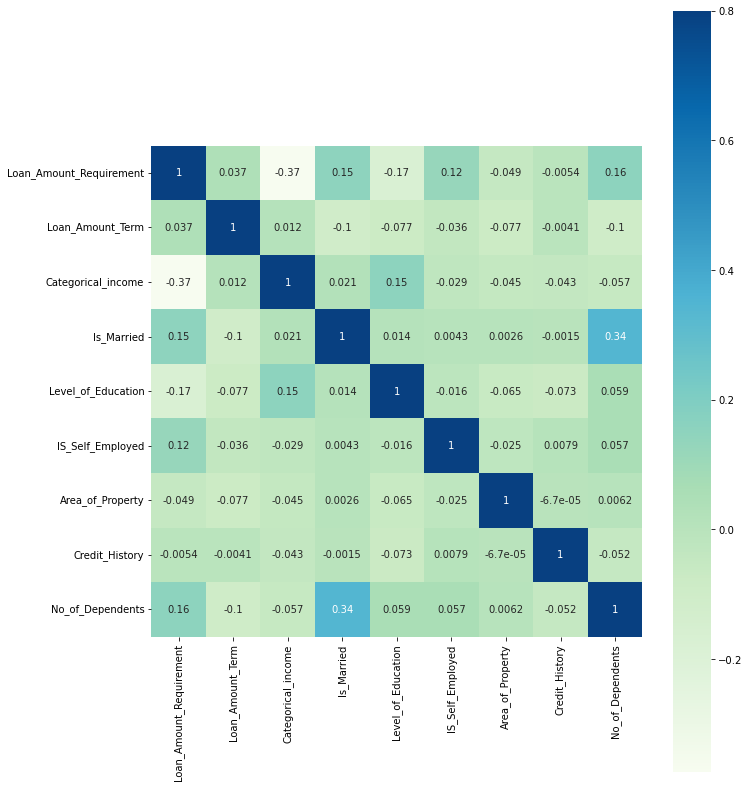

In [29]:
# Correlation Matrix to find the correlation between the features in the dataset
matx = df2.iloc[:,0:9].corr()
f, ax = plt.subplots(figsize=(11, 14))
sns.heatmap(matx, vmax=.8, square=True, cmap="GnBu",annot=True)

From the correlation matrix we can deduce that all the features that are selected have significance in determining Y (Loan_Status)

In [30]:
def feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True) # Sort the DataFrame in order decreasing feature importance
    plt.figure(figsize=(10,8)) # Define size of bar plot in the graph
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])# Plot Searborn bar chart for feature importance
    #Add chart labels for feature importance graph
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

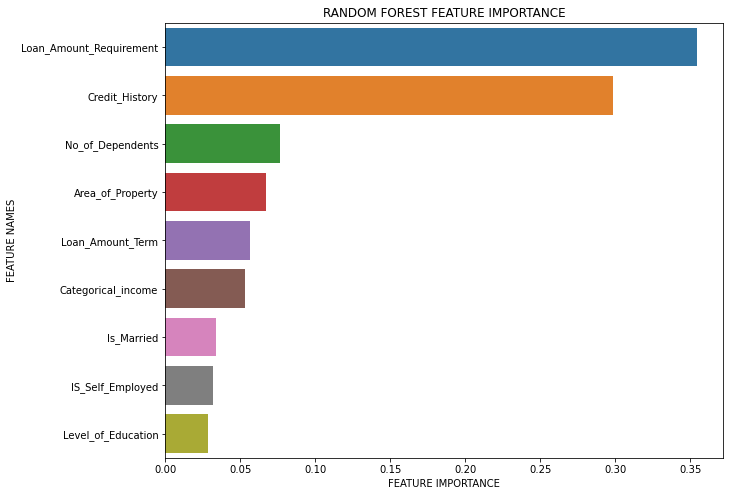

In [31]:
#Random Forest for feature importance
x = df2.iloc[:,0:9]
y = df2.iloc[:,9] # Extracting column Loan_Status and saving it to 'y'
rand_f = RandomForestClassifier().fit(x, y) # Fitting the training_data and storing it in rand_f
feature_importance(rand_f.feature_importances_, x.columns, 'RANDOM FOREST') # Printing the plot for important features in the dataset

This plot helps us understand which features have high importance in determining Y(Loan_status)

In [32]:
cat_val = df.Categorical_income.value_counts()

<AxesSubplot:>

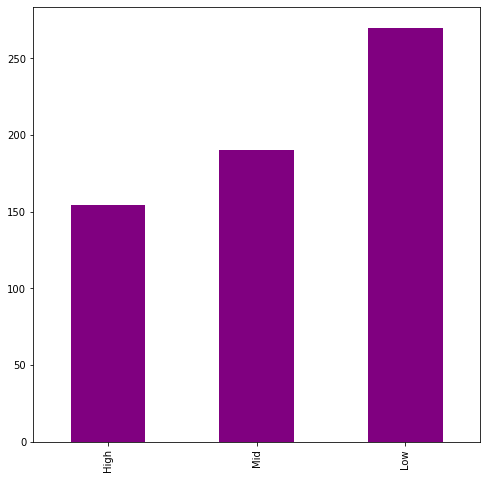

In [33]:
cat_val.sort_values().plot(kind = 'bar',figsize = (8,8), color = 'purple')

In [34]:
lar = df2.Loan_Amount_Requirement.value_counts()

<AxesSubplot:ylabel='Loan_Amount_Requirement'>

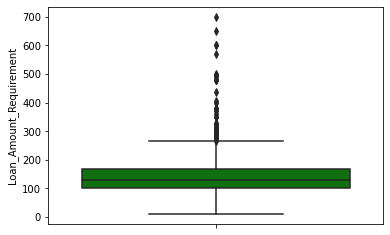

In [35]:
sns.boxplot(data = df2, y = 'Loan_Amount_Requirement', color = 'g')

In [36]:
comp= df.groupby('Categorical_income').agg({'Loan_Amount_Requirement':'median'})
comp

Loan_Amount_Requirement
Categorical_income                         
Low                              101.318008
Mid                              139.000000
High                             200.000000

from bargraph and variable 'comp' it can be deduced that data is being highly influenced by loan requirements of low and middle income level applicants, if outliers are removed then it will severly impact the influence of Loan_amount_requirement feature in predicting Y of High income category applicants. Thus outliers will not be removed.   

<AxesSubplot:>

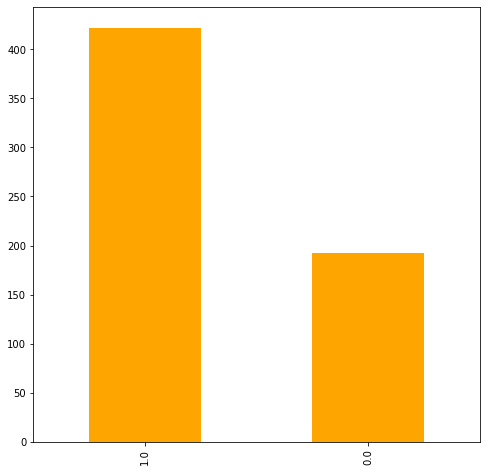

In [37]:
Y = df2.Loan_Status.value_counts()
Y.plot(kind = 'bar',figsize = (8,8), color = 'orange')

This bar graph indicates that our Y variable is skewed which will impavct the final result of our models

# Various Classifiers and Their Performance 

In [38]:
#defining a classifier for checking accuracy of various models 
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y_test, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_test * 100, y_pred * 100) * 100)]

# <span style ='color:Purple'> 1. Decision Tree Classifier (No sampling) </span>

In [39]:
clf=DecisionTreeClassifier()

In [40]:
#defining Features for the model 
X = df2.iloc[:,:9]
X.head()

Loan_Amount_Requirement  Loan_Amount_Term  Categorical_income  Is_Married  \
0               140.082873             360.0                 2.0         0.0   
1               128.000000             360.0                 2.0         1.0   
2                66.000000             360.0                 1.0         1.0   
3               120.000000             360.0                 1.0         1.0   
4               141.000000             360.0                 2.0         0.0   

   Level_of_Education  IS_Self_Employed  Area_of_Property  Credit_History  \
0                 0.0               0.0               2.0             1.0   
1                 0.0               0.0               0.0             1.0   
2                 0.0               1.0               2.0             1.0   
3                 1.0               0.0               2.0             1.0   
4                 0.0               0.0               2.0             1.0   

   No_of_Dependents  
0               0.0  
1               1.0  
2               0.0  
3               0.0  
4               0.0

In [41]:
#Defining 
y = df2.iloc[:,-1]
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [42]:
#Train test split where 80% is train and remaining is test
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

<AxesSubplot:>

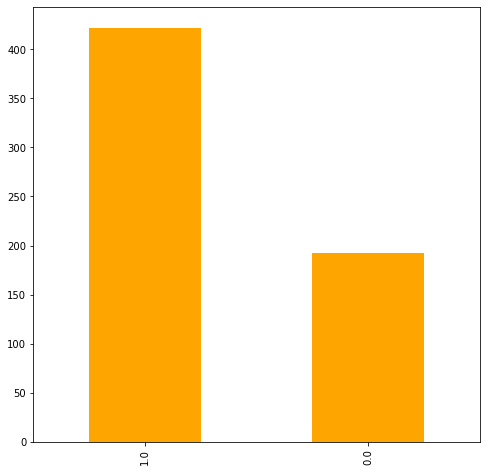

In [43]:
Y_before_sampling = df2.Loan_Status.value_counts()
Y_before_sampling.plot(kind = 'bar',figsize = (8,8), color = 'orange')

In [44]:
clf=DecisionTreeClassifier()

In [45]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_fig= df.iloc[:,10]
y_fig

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [47]:
features=X.columns[0:9]
classes=y_fig.unique()
print(features)
print(classes)

Index(['Loan_Amount_Requirement', 'Loan_Amount_Term', 'Categorical_income',
       'Is_Married', 'Level_of_Education', 'IS_Self_Employed',
       'Area_of_Property', 'Credit_History', 'No_of_Dependents'],
      dtype='object')
['Y' 'N']


In [48]:
dot_data = tree.export_graphviz(clf,feature_names=features, class_names=classes,filled=True, rounded=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [49]:
preds=clf.predict(X_test)

In [50]:
results = pd.DataFrame(columns = ['Training Accuracy', 'Testing Accuracy'],index = [ 'Support Vector Machines', 'Random Forest'])

The Training Accuracy of the algorithm is  0.9959266802443992
The Testing Accuracy of the algorithm is  0.6422764227642277


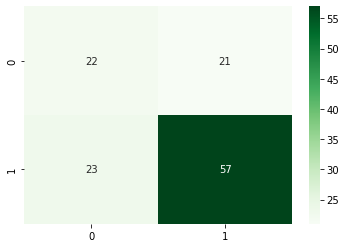

In [51]:
results.loc['DTClassifier'] = model_evaluation(clf);    

Model is overfitted as training set qccuracy is 99% while test set accuracy is 69% 

# Improving Model by manually giving the end condition of max depth =7

In [52]:
clf1=DecisionTreeClassifier(max_depth=7)

In [53]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [54]:
dot_data = tree.export_graphviz(clf1,feature_names=features, class_names=classes,filled=True, rounded=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [55]:
results.loc['DTClass1'] = model_evaluation(clf1);

The Training Accuracy of the algorithm is  0.8839103869653768
The Testing Accuracy of the algorithm is  0.7317073170731707


The accuracy score has now improved to 75% for test data set and is almost 85% for training dataset, it can still be considered an overfitted model however results are better after pruning 

#  <span style ='color:Purple'> 2. Decision Tree Classifier (Random over sampling) </span>

In [56]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X,y = ros.fit_resample(x, y)
print(X)

     Loan_Amount_Requirement  Loan_Amount_Term  Categorical_income  \
0                 140.082873             360.0                 2.0   
1                 128.000000             360.0                 2.0   
2                  66.000000             360.0                 1.0   
3                 120.000000             360.0                 1.0   
4                 141.000000             360.0                 2.0   
..                       ...               ...                 ...   
839               101.318008             180.0                 1.0   
840                61.000000             360.0                 1.0   
841               146.000000             360.0                 1.0   
842                45.000000             180.0                 1.0   
843                98.000000             360.0                 1.0   

     Is_Married  Level_of_Education  IS_Self_Employed  Area_of_Property  \
0           0.0                 0.0               0.0               2.0   
1        

<AxesSubplot:>

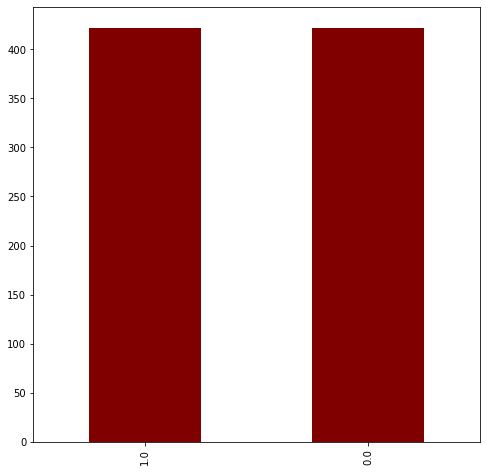

In [57]:
Y_after_ros= y.value_counts()
Y_after_ros.plot(kind = 'bar',figsize = (8,8), color = 'maroon')

In [58]:
X_train1, X_test1, y_train1,y_test1 = train_test_split(X,y,test_size=0.2, random_state= 42)

In [59]:
clf1.fit(X_train1,y_train1)    #same classifier trained with oversampled data 

DecisionTreeClassifier(max_depth=7)

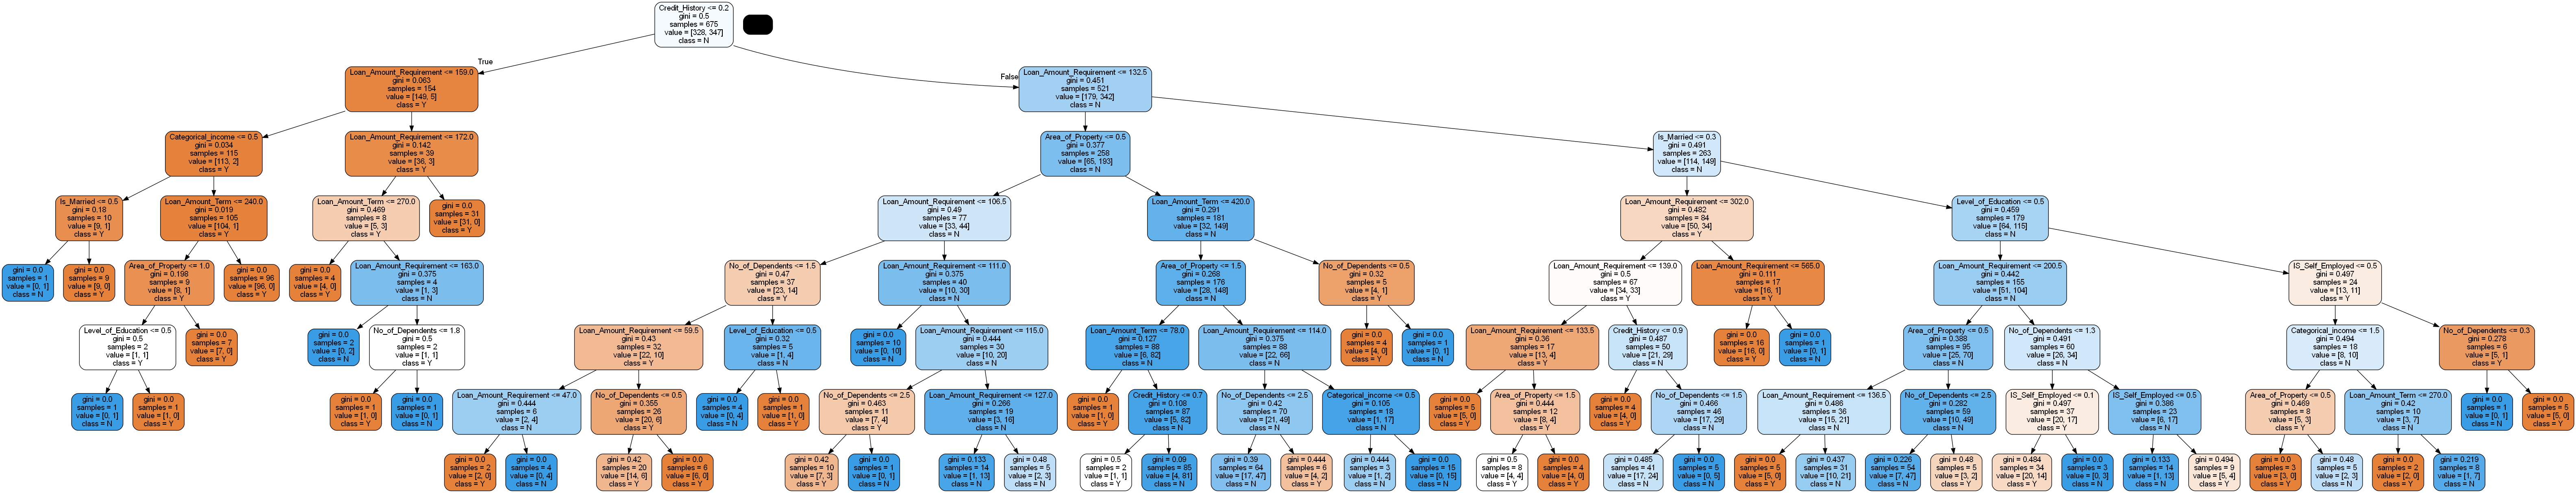

In [60]:
dot_data = tree.export_graphviz(clf1,feature_names=features, class_names=classes,filled=True, rounded=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

The Training Accuracy of the algorithm is  0.8309572301425662
The Testing Accuracy of the algorithm is  0.8048780487804879


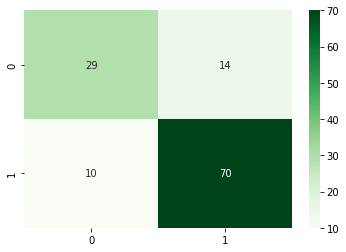

In [61]:
results.loc['DTOversampleddata'] = model_evaluation(clf1);

# <span style ='color:Purple'> 3. Random Forest Classifier </span>

In [62]:
rfc = RandomForestClassifier(max_depth = 7)

In [63]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

The Training Accuracy of the algorithm is  0.8615071283095723
The Testing Accuracy of the algorithm is  0.7560975609756098


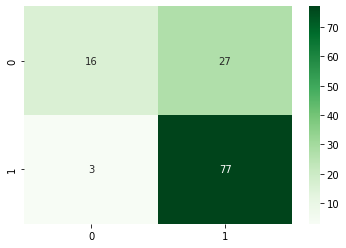

In [64]:
results.loc['Random Forest'] = model_evaluation(rfc);

#  <span style ='color:Purple'> 4. Naive Bayes Classifier </span>

In [65]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

The Training Accuracy of the algorithm is  0.814663951120163
The Testing Accuracy of the algorithm is  0.7804878048780488


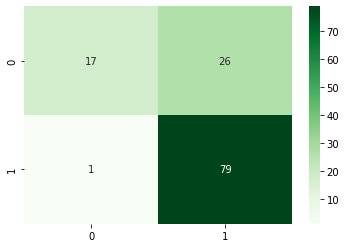

In [66]:
results.loc['Naive Bayes'] = model_evaluation(gnb);

# <span style ='color:Purple'> 5. Support Vector Machine </span>

In [67]:
 svm1 = SVC(C = 1000)

In [68]:
svm1.fit(X_train,y_train)

SVC(C=1000)

The Training Accuracy of the algorithm is  0.7087576374745418
The Testing Accuracy of the algorithm is  0.6341463414634146


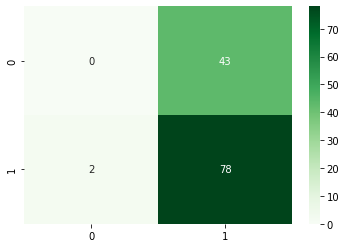

In [69]:
results.loc['Support Vector Machines'] = model_evaluation(svm1);

# <span style ='color:Purple'> Results_problem 1 </span>

In [70]:
results

Training Accuracy  Testing Accuracy
Support Vector Machines          70.875764         63.414634
Random Forest                    86.150713         75.609756
DTClassifier                     99.592668         64.227642
DTClass1                         88.391039         73.170732
DTOversampleddata                83.095723         80.487805
Naive Bayes                      81.466395         78.048780

# Random forest algorithm came out to be best of all implemented algorithms 

# <span style ='color:Red'> Problem_2 </span> 

In [71]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.model_selection import train_test_split

In [72]:
cdf = pd.read_csv("C:\Test_route\Clustering_cardata.csv")
print(cdf.shape)
print(cdf.dtypes)

(25, 18)
Resp.Id                            int64
Indian Technlogy high order        int64
Buy Made in India                  int64
Value for money                    int64
Convenience over style             int64
Don't do waste full expenditure    int64
No compromise on safety            int64
Saver not spender                  int64
Try new things                     int64
Be part of a changing world        int64
Purchase Intentions                int64
Occupation                         int64
Family income                      int64
Family size                        int64
Marital Status                     int64
Education                          int64
Age                                int64
Nature of Job                      int64
dtype: object


In [73]:
cdf.head(5)

Resp.Id  Indian Technlogy high order  Buy Made in India  Value for money  \
0        1                            5                  5                3   
1        2                            3                  3                5   
2        3                            1                  1                1   
3        4                            5                  5                4   
4        5                            2                  2                4   

   Convenience over style  Don't do waste full expenditure  \
0                       2                                3   
1                       4                                4   
2                       2                                1   
3                       2                                3   
4                       5                                4   

   No compromise on safety  Saver not spender  Try new things  \
0                        3                  4               1   
1                        5                  4               1   
2                        2                  1               4   
3                        4                  3               2   
4                        5                  4               2   

   Be part of a changing world  Purchase Intentions  Occupation  \
0                            1                    1           2   
1                            1                    0           2   
2                            4                    0           2   
3                            2                    1           2   
4                            2                    0           2   

   Family income  Family size  Marital Status  Education  Age  Nature of Job  
0              4            2               1          3    3              1  
1              2            1               2          3    2              1  
2              1            3               1          3    1              1  
3              4            2               1          3    3              1  
4              4            3               2          3    2              1

In [74]:
#Ignore first column (respid)
cdf=cdf.iloc[:,1:18]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [60.0, 60.0, 75.0, 75.0],
  [67.5, 67.5, 85.0, 85.0],
  [76.25, 76.25, 95.0, 95.0],
  [35.625, 35.625, 85.625, 85.625],
  [105.0, 105.0, 115.0, 115.0],
  [110.0, 110.0, 125.0, 125.0],
  [117.5, 117.5, 135.0, 135.0],
  [126.25, 126.25, 145.0, 145.0],
  [135.625, 135.625, 155.0, 155.0],
  [60.625, 60.625, 145.3125, 145.3125],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [190.0, 190.0, 205.0, 205.0],
  [170.0, 170.0, 197.5, 197.5],
  [215.0, 215.0, 225.0, 225.0],
  [183.75, 183.75, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [201.875, 201.875, 240.0, 240.0],
  [102.96875, 102.96875, 220.9375, 220.9375]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [2.0, 2.6457513110645907, 2.6457513110645907, 0.0],
  [2.6457513110645907, 3.04155125386279, 3.04155125386279, 0.0],
  [3.04155125386279, 3.7953469506867505, 3.7953469506867505,

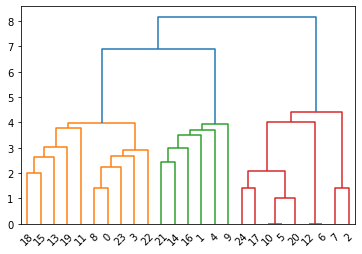

In [75]:
#Agglomorative Hierarchical clustering with euclidean distance measurement and average linking method
Link_1 = linkage(cdf, 'average','euclidean')
dendrogram(Link_1, orientation='top',
            distance_sort='descending',
            show_leaf_counts=True) 

In [76]:
#create 3 clusters using hierarchical clustering method
cc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
ccl=cc.fit_predict(cdf)
print(ccl)

[1 2 0 1 2 0 0 0 1 2 0 1 0 1 2 1 2 0 1 1 0 2 1 1 0]


In [77]:
cdf=pd.concat([cdf,pd.Series(ccl)],axis=1)
cdf.head(5)

Indian Technlogy high order  Buy Made in India  Value for money  \
0                            5                  5                3   
1                            3                  3                5   
2                            1                  1                1   
3                            5                  5                4   
4                            2                  2                4   

   Convenience over style  Don't do waste full expenditure  \
0                       2                                3   
1                       4                                4   
2                       2                                1   
3                       2                                3   
4                       5                                4   

   No compromise on safety  Saver not spender  Try new things  \
0                        3                  4               1   
1                        5                  4               1   
2                        2                  1               4   
3                        4                  3               2   
4                        5                  4               2   

   Be part of a changing world  Purchase Intentions  Occupation  \
0                            1                    1           2   
1                            1                    0           2   
2                            4                    0           2   
3                            2                    1           2   
4                            2                    0           2   

   Family income  Family size  Marital Status  Education  Age  Nature of Job  \
0              4            2               1          3    3              1   
1              2            1               2          3    2              1   
2              1            3               1          3    1              1   
3              4            2               1          3    3              1   
4              4            3               2          3    2              1   

   0  
0  1  
1  2  
2  0  
3  1  
4  2

In [78]:
#Assign column names"clusterLabel"]
cdf.rename(columns={0:"ClusterLabel"}, inplace=True)
cdf

Indian Technlogy high order  Buy Made in India  Value for money  \
0                             5                  5                3   
1                             3                  3                5   
2                             1                  1                1   
3                             5                  5                4   
4                             2                  2                4   
5                             2                  2                1   
6                             3                  3                2   
7                             1                  1                1   
8                             4                  5                3   
9                             1                  1                4   
10                            2                  2                1   
11                            5                  4                3   
12                            3                  3                2   
13                            5                  5                2   
14                            3                  2                5   
15                            4                  5                2   
16                            2                  1                5   
17                            2                  3                2   
18                            4                  5                3   
19                            4                  4                2   
20                            2                  2                1   
21                            2                  1                5   
22                            4                  4                2   
23                            4                  5                3   
24                            2                  3                2   

    Convenience over style  Don't do waste full expenditure  \
0                        2                                3   
1                        4                                4   
2                        2                                1   
3                        2                                3   
4                        5                                4   
5                        2                                1   
6                        1                                1   
7                        2                                1   
8                        3                                3   
9                        4                                3   
10                       2                                1   
11                       2                                3   
12                       1                                1   
13                       2                                2   
14                       5                                5   
15                       2                                3   
16                       5                                5   
17                       2                                1   
18                       3                                3   
19                       1                                3   
20                       2                                1   
21                       5                                5   
22                       2                                2   
23                       2                                3   
24                       2                                1   

    No compromise on safety  Saver not spender  Try new things  \
0                         3                  4               1   
1                         5                  4               1   
2                         2                  1               4   
3                         4                  3               2   
4                         5                  4               2   
5                         1                  1               5   
6                         1                  1          

In [79]:
#Count number of data points in each cluster
cdf["ClusterLabel"].value_counts()

1    10
0     9
2     6
Name: ClusterLabel, dtype: int64

In [80]:
#Sort data by cluster to understand cluster characterisitcs
cdf=cdf.sort_values(by=['ClusterLabel'])
cdf

Indian Technlogy high order  Buy Made in India  Value for money  \
12                            3                  3                2   
20                            2                  2                1   
17                            2                  3                2   
10                            2                  2                1   
7                             1                  1                1   
6                             3                  3                2   
24                            2                  3                2   
2                             1                  1                1   
5                             2                  2                1   
15                            4                  5                2   
22                            4                  4                2   
19                            4                  4                2   
18                            4                  5                3   
0                             5                  5                3   
23                            4                  5                3   
11                            5                  4                3   
3                             5                  5                4   
8                             4                  5                3   
13                            5                  5                2   
14                            3                  2                5   
16                            2                  1                5   
9                             1                  1                4   
1                             3                  3                5   
21                            2                  1                5   
4                             2                  2                4   

    Convenience over style  Don't do waste full expenditure  \
12                       1                                1   
20                       2                                1   
17                       2                                1   
10                       2                                1   
7                        2                                1   
6                        1                                1   
24                       2                                1   
2                        2                                1   
5                        2                                1   
15                       2                                3   
22                       2                                2   
19                       1                                3   
18                       3                                3   
0                        2                                3   
23                       2                                3   
11                       2                                3   
3                        2                                3   
8                        3                                3   
13                       2                                2   
14                       5                                5   
16                       5                                5   
9                        4                                3   
1                        4                                4   
21                       5                                5   
4                        5                                4   

    No compromise on safety  Saver not spender  Try new things  \
12                        1                  1               5   
20                        1                  1               5   
17                        1                  1               5   
10                        1                  1               5   
7                         2                  1               4   
6                         1                  1               5   
24                        1                  1          

In [81]:
#hierarchical cluster doesn't return cluster centre so do calculations using groupby function in python
#cluster centres are required for characterization of the cluster
Car_Data_Label=cdf.groupby(by='ClusterLabel')
Car_Data_Label.mean()

Indian Technlogy high order  Buy Made in India  Value for money  \
ClusterLabel                                                                    
0                                2.000000           2.222222         1.444444   
1                                4.400000           4.700000         2.700000   
2                                2.166667           1.666667         4.666667   

              Convenience over style  Don't do waste full expenditure  \
ClusterLabel                                                            
0                           1.777778                         1.000000   
1                           2.100000                         2.800000   
2                           4.666667                         4.333333   

              No compromise on safety  Saver not spender  Try new things  \
ClusterLabel                                                               
0                            1.222222           1.000000        4.777778   
1                            2.600000           2.600000        1.200000   
2                            4.666667           4.166667        1.500000   

              Be part of a changing world  Purchase Intentions  Occupation  \
ClusterLabel                                                                 
0                                4.333333             0.555556    2.222222   
1                                1.400000             0.700000    1.800000   
2                                1.333333             0.000000    2.166667   

              Family income  Family size  Marital Status  Education       Age  \
ClusterLabel                                                                    
0                  2.777778     1.888889        1.333333   3.222222  1.222222   
1                  3.400000     2.400000        1.300000   3.000000  2.800000   
2                  2.000000     2.333333        2.000000   3.000000  2.333333   

              Nature of Job  
ClusterLabel                 
0                  1.444444  
1                  1.200000  
2                  1.500000

In [82]:
cdf["ClusterLabel"]=cdf["ClusterLabel"].map({0:"Lavish Buyers", 1:"Patriotic Buyers", 2:"Stingy Buyers"})

In [83]:
cdf

Indian Technlogy high order  Buy Made in India  Value for money  \
12                            3                  3                2   
20                            2                  2                1   
17                            2                  3                2   
10                            2                  2                1   
7                             1                  1                1   
6                             3                  3                2   
24                            2                  3                2   
2                             1                  1                1   
5                             2                  2                1   
15                            4                  5                2   
22                            4                  4                2   
19                            4                  4                2   
18                            4                  5                3   
0                             5                  5                3   
23                            4                  5                3   
11                            5                  4                3   
3                             5                  5                4   
8                             4                  5                3   
13                            5                  5                2   
14                            3                  2                5   
16                            2                  1                5   
9                             1                  1                4   
1                             3                  3                5   
21                            2                  1                5   
4                             2                  2                4   

    Convenience over style  Don't do waste full expenditure  \
12                       1                                1   
20                       2                                1   
17                       2                                1   
10                       2                                1   
7                        2                                1   
6                        1                                1   
24                       2                                1   
2                        2                                1   
5                        2                                1   
15                       2                                3   
22                       2                                2   
19                       1                                3   
18                       3                                3   
0                        2                                3   
23                       2                                3   
11                       2                                3   
3                        2                                3   
8                        3                                3   
13                       2                                2   
14                       5                                5   
16                       5                                5   
9                        4                                3   
1                        4                                4   
21                       5                                5   
4                        5                                4   

    No compromise on safety  Saver not spender  Try new things  \
12                        1                  1               5   
20                        1                  1               5   
17                        1                  1               5   
10                        1                  1               5   
7                         2                  1               4   
6                         1                  1               5   
24                        1                  1          

#0: Lavish Buyers: These are those who like to spend money on cars. Safety is utmost priority for them. They like to try new things and want to be a part of the changing world.

#1: Patriotic Buyers: These buyers are conservative and thus, don't want to be a part of the changing world. They are highly inclined towards the Indian technology and mostly prefer to buy Indian product.

#2: Stingy Buyers: Value for Money is given high weightage, convenience is more prefferred over style. They are willing to compromise safety to save money.

# <span style ='color:Red'> Problem_3 </span> 

In [84]:
#import all required classes for market basket analysis from mlxtend library
from mlxtend.preprocessing import TransactionEncoder #required to transform transaction data to the required format
from mlxtend.frequent_patterns import apriori #required to generate frequent itemset
from mlxtend.frequent_patterns import association_rules #required to generate rules

In [85]:
darm = pd.read_csv("C:/Test_route/Association_Rule_Mining_Data.csv")
darm.head()

Row Labels  Almonds  Poha  Banana  Beans  Besan  Boiled Rice  Bread  \
0     6468572      NaN   NaN     1.0    NaN    NaN          NaN    NaN   
1     6486475      NaN   NaN     NaN    NaN    NaN          1.0    NaN   
2     6504964      1.0   NaN     NaN    NaN    NaN          1.0    NaN   
3     6529569      NaN   NaN     1.0    NaN    NaN          NaN    NaN   
4     6549521      NaN   NaN     1.0    NaN    NaN          NaN    NaN   

   Brinjals  Buns & Pavs  ...  Sooji & Rava  Soya Products  Sugar  \
0       NaN          NaN  ...           NaN            NaN    1.0   
1       NaN          1.0  ...           NaN            NaN    NaN   
2       NaN          NaN  ...           NaN            NaN    NaN   
3       NaN          NaN  ...           NaN            NaN    1.0   
4       NaN          NaN  ...           NaN            NaN    NaN   

   Sugar Cubes  Sunflower Oils  Toor Dal  Urad Dal  Utensil Scrub Pads  \
0          1.0             NaN       NaN       NaN                 NaN   
1          NaN             NaN       1.0       NaN                 1.0   
2          NaN             NaN       NaN       1.0                 NaN   
3          NaN             NaN       1.0       1.0                 NaN   
4          1.0             NaN       NaN       NaN                 NaN   

   Washing Bars  Whole Spices  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  

[5 rows x 54 columns]

In [86]:
#replace all NA values with 0
darm.fillna(0)

Row Labels  Almonds  Poha  Banana  Beans  Besan  Boiled Rice  Bread  \
0      6468572      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
1      6486475      0.0   0.0     0.0    0.0    0.0          1.0    0.0   
2      6504964      1.0   0.0     0.0    0.0    0.0          1.0    0.0   
3      6529569      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
4      6549521      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
5      6562518      0.0   0.0     0.0    1.0    0.0          1.0    0.0   
6      6596905      0.0   0.0     1.0    1.0    0.0          1.0    0.0   
7      6612806      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
8      6624000      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
9      6638454      0.0   0.0     1.0    1.0    0.0          1.0    0.0   
10     6656240      0.0   0.0     1.0    1.0    0.0          0.0    0.0   
11     6672349      0.0   0.0     0.0    1.0    0.0          1.0    0.0   
12     6687487      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
13     6704782      0.0   0.0     0.0    0.0    0.0          1.0    0.0   
14     6723554      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
15     6734605      0.0   0.0     0.0    1.0    0.0          0.0    0.0   
16     6743451      0.0   0.0     0.0    0.0    0.0          0.0    0.0   
17     6759502      0.0   0.0     0.0    0.0    0.0          0.0    0.0   
18     6774006      0.0   1.0     1.0    0.0    1.0          1.0    0.0   
19     6786934      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
20     6794402      1.0   0.0     1.0    1.0    0.0          1.0    0.0   
21     6811376      0.0   0.0     1.0    1.0    0.0          0.0    0.0   
22     7874962      0.0   0.0     1.0    1.0    0.0          0.0    0.0   
23     7887787      0.0   0.0     1.0    0.0    0.0          1.0    0.0   
24     7931131      1.0   0.0     1.0    1.0    0.0          1.0    0.0   
25     7948600      0.0   0.0     1.0    1.0    0.0          1.0    0.0   
26     7969005      0.0   0.0     1.0    0.0    0.0          0.0    1.0   
27     7980335      0.0   0.0     1.0    0.0    0.0          1.0    0.0   
28     7998535      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
29     8008269      0.0   0.0     1.0    1.0    0.0          1.0    0.0   
30     8014606      0.0   0.0     0.0    0.0    0.0          0.0    0.0   
31     8026271      0.0   0.0     1.0    1.0    1.0          0.0    0.0   
32     8030611      0.0   0.0     0.0    0.0    0.0          0.0    0.0   
33     8039388      0.0   0.0     1.0    1.0    0.0          0.0    1.0   
34     8044079      0.0   0.0     1.0    0.0    0.0          1.0    0.0   
35     8052390      0.0   0.0     0.0    1.0    0.0          0.0    0.0   
36     8057553      0.0   0.0     1.0    0.0    0.0          1.0    0.0   
37     8062224      0.0   0.0     1.0    1.0    0.0          0.0    0.0   
38     8068900      0.0   0.0     1.0    0.0    0.0          0.0    1.0   
39     8087495      0.0   0.0     1.0    1.0    0.0          0.0    0.0   
40     8093634      0.0   0.0     0.0    0.0    0.0          0.0    0.0   
41     8104219      0.0   0.0     1.0    1.0    0.0          0.0    1.0   
42     8116554      1.0   0.0     1.0    1.0    0.0          1.0    1.0   
43     8132674      1.0   0.0     1.0    1.0    0.0          1.0    1.0   
44     8143489      0.0   0.0     1.0    1.0    0.0          0.0    0.0   
45     8156232      1.0   1.0     1.0    1.0    0.0          1.0    1.0   
46     8166849      1.0   0.0     1.0    1.0    0.0          1.0    0.0   
47     8181410      0.0   0.0     0.0    1.0    0.0          0.0    0.0   
48     8184240      0.0   0.0     1.0    0.0    0.0          0.0    0.0   
49     8199070      0.0   0.0     0.0    0.0    0.0          0.0    0.0   

    Brinjals  Buns & Pavs  ...  Sooji & Rava  Soya Products  Sugar  \
0        0.0          0.0  ...           0.0            0.0    1.0   
1        0.0          1.0  ...        

In [87]:
#replace all 1 with True and 0 with False
darm = darm.applymap(lambda x: True if x == 1 else False)

In [88]:
darm.head()

Row Labels  Almonds   Poha  Banana  Beans  Besan  Boiled Rice  Bread  \
0       False    False  False    True  False  False        False  False   
1       False    False  False   False  False  False         True  False   
2       False     True  False   False  False  False         True  False   
3       False    False  False    True  False  False        False  False   
4       False    False  False    True  False  False        False  False   

   Brinjals  Buns & Pavs  ...  Sooji & Rava  Soya Products  Sugar  \
0     False        False  ...         False          False   True   
1     False         True  ...         False          False  False   
2     False        False  ...         False          False  False   
3     False        False  ...         False          False   True   
4     False        False  ...         False          False  False   

   Sugar Cubes  Sunflower Oils  Toor Dal  Urad Dal  Utensil Scrub Pads  \
0         True           False     False     False               False   
1        False           False      True     False                True   
2        False           False     False      True               False   
3        False           False      True      True               False   
4         True           False     False     False               False   

   Washing Bars  Whole Spices  
0         False         False  
1         False         False  
2         False         False  
3         False         False  
4         False         False  

[5 rows x 54 columns]

In [89]:
#find frequent itemsets in the data with specified support count using apriori algorithm
frequent_itemsets = apriori(darm, min_support=0.20, use_colnames=True)
#if you don't set use_colnames=True, it returns column index instead of column name (item name)

Support is taken as 20% meaning the items which have occured more than 20% throughout the dataset will be considered as frequent

In [90]:
#display frequent itemsets. 
frequent_itemsets

support                                           itemsets
0       0.72                                           (Banana)
1       0.48                                            (Beans)
2       0.40                                      (Boiled Rice)
3       0.20                                          (Cashews)
4       0.20                                             (Eggs)
..       ...                                                ...
154     0.20  (Other Vegetables, Other Dals, Root Vegetables...
155     0.20       (Sugar, Other Dals, Root Vegetables, Banana)
156     0.20              (Sugar, Urad Dal, Other Dals, Banana)
157     0.20  (Sugar Cubes, Root Vegetables, Snacky Nuts, Ba...
158     0.20  (Other Vegetables, Other Dals, Beans, Root Veg...

[159 rows x 2 columns]

In [91]:
#find length of each itemset
frequent_itemsets["itemsets_length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

In [92]:
frequent_itemsets

support                                           itemsets  \
0       0.72                                           (Banana)   
1       0.48                                            (Beans)   
2       0.40                                      (Boiled Rice)   
3       0.20                                          (Cashews)   
4       0.20                                             (Eggs)   
..       ...                                                ...   
154     0.20  (Other Vegetables, Other Dals, Root Vegetables...   
155     0.20       (Sugar, Other Dals, Root Vegetables, Banana)   
156     0.20              (Sugar, Urad Dal, Other Dals, Banana)   
157     0.20  (Sugar Cubes, Root Vegetables, Snacky Nuts, Ba...   
158     0.20  (Other Vegetables, Other Dals, Beans, Root Veg...   

     itemsets_length  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
154                4  
155                4  
156                4  
157                4  
158                4  

[159 rows x 3 columns]

In [93]:
#generate rules from frequent itemsets by specifying threshold for confidence or lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=.5)

In [94]:
#display rules
rules

antecedents  \
0                                (Beans)   
1                               (Banana)   
2                          (Boiled Rice)   
3                  (Liquid Soaps & Bars)   
4                              (Namkeen)   
..                                   ...   
525  (Other Vegetables, Root Vegetables)   
526                  (Other Dals, Beans)   
527        (Other Dals, Root Vegetables)   
528             (Beans, Root Vegetables)   
529                   (Other Vegetables)   

                              consequents  antecedent support  \
0                                (Banana)                0.48   
1                                 (Beans)                0.72   
2                                (Banana)                0.40   
3                                (Banana)                0.22   
4                                (Banana)                0.40   
..                                    ...                 ...   
525                   (Other Dals, Beans)                0.24   
526   (Other Vegetables, Root Vegetables)                0.30   
527             (Other Vegetables, Beans)                0.30   
528        (Other Vegetables, Other Dals)                0.34   
529  (Other Dals, Beans, Root Vegetables)                0.38   

     consequent support  support  confidence      lift  leverage  conviction  
0                  0.72     0.38    0.791667  1.099537    0.0344    1.344000  
1                  0.48     0.38    0.527778  1.099537    0.0344    1.101176  
2                  0.72     0.30    0.750000  1.041667    0.0120    1.120000  
3                  0.72     0.20    0.909091  1.262626    0.0416    3.080000  
4                  0.72     0.36    0.900000  1.250000    0.0720    2.800000  
..                  ...      ...         ...       ...       ...         ...  
525                0.30     0.20    0.833333  2.777778    0.1280    4.200000  
526                0.24     0.20    0.666667  2.777778    0.1280    2.280000  
527                0.32     0.20    0.666667  2.083333    0.1040    2.040000  
528                0.26     0.20    0.588235  2.262443    0.1116    1.797143  
529                0.26     0.20    0.526316  2.024291    0.1012    1.562222  

[530 rows x 9 columns]

Here confidence level is set at 50% and all the rules that satisfy this threshold is displayed. Confidence here means that the possibility of occurence of antecedents if consequents are occuring atleast 50% of times.  

In [95]:
#Create three columns specifying length of antecedent, consequents, and total length of the rule
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules["total_len"] = rules["antecedent_len"]+rules["consequents_len"]

In [96]:
#now check rules
rules

antecedents  \
0                                (Beans)   
1                               (Banana)   
2                          (Boiled Rice)   
3                  (Liquid Soaps & Bars)   
4                              (Namkeen)   
..                                   ...   
525  (Other Vegetables, Root Vegetables)   
526                  (Other Dals, Beans)   
527        (Other Dals, Root Vegetables)   
528             (Beans, Root Vegetables)   
529                   (Other Vegetables)   

                              consequents  antecedent support  \
0                                (Banana)                0.48   
1                                 (Beans)                0.72   
2                                (Banana)                0.40   
3                                (Banana)                0.22   
4                                (Banana)                0.40   
..                                    ...                 ...   
525                   (Other Dals, Beans)                0.24   
526   (Other Vegetables, Root Vegetables)                0.30   
527             (Other Vegetables, Beans)                0.30   
528        (Other Vegetables, Other Dals)                0.34   
529  (Other Dals, Beans, Root Vegetables)                0.38   

     consequent support  support  confidence      lift  leverage  conviction  \
0                  0.72     0.38    0.791667  1.099537    0.0344    1.344000   
1                  0.48     0.38    0.527778  1.099537    0.0344    1.101176   
2                  0.72     0.30    0.750000  1.041667    0.0120    1.120000   
3                  0.72     0.20    0.909091  1.262626    0.0416    3.080000   
4                  0.72     0.36    0.900000  1.250000    0.0720    2.800000   
..                  ...      ...         ...       ...       ...         ...   
525                0.30     0.20    0.833333  2.777778    0.1280    4.200000   
526                0.24     0.20    0.666667  2.777778    0.1280    2.280000   
527                0.32     0.20    0.666667  2.083333    0.1040    2.040000   
528                0.26     0.20    0.588235  2.262443    0.1116    1.797143   
529                0.26     0.20    0.526316  2.024291    0.1012    1.562222   

     antecedent_len  consequents_len  total_len  
0                 1                1          2  
1                 1                1          2  
2                 1                1          2  
3                 1                1          2  
4                 1                1          2  
..              ...              ...        ...  
525               2                2          4  
526               2                2          4  
527               2                2          4  
528               2                2          4  
529               1                3          4  

[530 rows x 12 columns]

In [97]:
#Rule 1: Here group of 2 or more products are chosen to recommend a third product that have confidence level of greater than 80% 
rule_1= rules[ (rules['antecedent_len'] ==2) &
       (rules['confidence'] > 0.8) &
       (rules['consequents_len'] ==1) ] 
rule_1

antecedents        consequents  antecedent support  \
111            (Boiled Rice, Beans)           (Banana)                0.24   
115                (Namkeen, Beans)           (Banana)                0.26   
120             (Other Dals, Beans)           (Banana)                0.30   
125       (Other Vegetables, Beans)           (Banana)                0.32   
126      (Other Vegetables, Banana)            (Beans)                0.32   
..                              ...                ...                 ...   
399  (Root Vegetables, Sugar Cubes)      (Snacky Nuts)                0.24   
400      (Snacky Nuts, Sugar Cubes)  (Root Vegetables)                0.24   
406     (Urad Dal, Root Vegetables)            (Sugar)                0.20   
410         (Urad Dal, Snacky Nuts)            (Sugar)                0.20   
415         (Urad Dal, Sugar Cubes)            (Sugar)                0.20   

     consequent support  support  confidence      lift  leverage  conviction  \
111                0.72     0.20    0.833333  1.157407    0.0272    1.680000   
115                0.72     0.24    0.923077  1.282051    0.0528    3.640000   
120                0.72     0.26    0.866667  1.203704    0.0440    2.100000   
125                0.72     0.26    0.812500  1.128472    0.0296    1.493333   
126                0.48     0.26    0.812500  1.692708    0.1064    2.773333   
..                  ...      ...         ...       ...       ...         ...   
399                0.40     0.20    0.833333  2.083333    0.1040    3.600000   
400                0.44     0.20    0.833333  1.893939    0.0944    3.360000   
406                0.50     0.20    1.000000  2.000000    0.1000         inf   
410                0.50     0.20    1.000000  2.000000    0.1000         inf   
415                0.50     0.20    1.000000  2.000000    0.1000         inf   

     antecedent_len  consequents_len  total_len  
111               2                1          3  
115               2                1          3  
120               2                1          3  
125               2                1          3  
126               2                1          3  
..              ...              ...        ...  
399               2                1          3  
400               2                1          3  
406               2                1          3  
410               2                1          3  
415               2                1          3  

[61 rows x 12 columns]

This rule can be used for store arrangement and thus it can be reccommended to the client 

In [98]:
#Rule 2 shows products with which banana is bought with a confidence of 90%
rule_2=rules[ (rules['consequents'] ==({'Banana'}))& (rules['confidence'] > 0.9) &(rules['antecedent_len'] ==3) ]

rule_2

antecedents consequents  \
418             (Other Dals, Beans, Root Vegetables)    (Banana)   
431       (Other Vegetables, Beans, Root Vegetables)    (Banana)   
442            (Beans, Root Vegetables, Snacky Nuts)    (Banana)   
463                (Snacky Nuts, Beans, Sugar Cubes)    (Banana)   
475  (Other Vegetables, Other Dals, Root Vegetables)    (Banana)   
486             (Sugar, Other Dals, Root Vegetables)    (Banana)   
507      (Snacky Nuts, Root Vegetables, Sugar Cubes)    (Banana)   

     antecedent support  consequent support  support  confidence      lift  \
418                0.26                0.72     0.24    0.923077  1.282051   
431                0.22                0.72     0.20    0.909091  1.262626   
442                0.22                0.72     0.20    0.909091  1.262626   
463                0.20                0.72     0.20    1.000000  1.388889   
475                0.22                0.72     0.20    0.909091  1.262626   
486                0.22                0.72     0.20    0.909091  1.262626   
507                0.20                0.72     0.20    1.000000  1.388889   

     leverage  conviction  antecedent_len  consequents_len  total_len  
418    0.0528        3.64               3                1          4  
431    0.0416        3.08               3                1          4  
442    0.0416        3.08               3                1          4  
463    0.0560         inf               3                1          4  
475    0.0416        3.08               3                1          4  
486    0.0416        3.08               3                1          4  
507    0.0560         inf               3                1          4

Products with which banana is being purchased very frequently 

In [99]:
#Rule 3 contains 1 products that have occured frequently to reccomend one product with confidence of higher than 90%
rule_3=rules[ (rules['antecedent_len'] ==1)&
       (rules['confidence'] > 0.90)&
       (rules['consequents_len'] ==1) ]

rule_3

antecedents   consequents  antecedent support  \
3    (Liquid Soaps & Bars)      (Banana)                0.22   
11       (Root Vegetables)      (Banana)                0.44   
21   (Liquid Soaps & Bars)       (Beans)                0.22   
76              (Toor Dal)  (Other Dals)                0.24   
108             (Urad Dal)       (Sugar)                0.36   

     consequent support  support  confidence      lift  leverage  conviction  \
3                  0.72     0.20    0.909091  1.262626    0.0416        3.08   
11                 0.72     0.40    0.909091  1.262626    0.0832        3.08   
21                 0.48     0.20    0.909091  1.893939    0.0944        5.72   
76                 0.48     0.22    0.916667  1.909722    0.1048        6.24   
108                0.50     0.34    0.944444  1.888889    0.1600        9.00   

     antecedent_len  consequents_len  total_len  
3                 1                1          2  
11                1                1          2  
21                1                1          2  
76                1                1          2  
108               1                1          2

This rule can be used to make combo of the products or test out new variants of the products by giving sample at discounted price

In [100]:
#Rule 4 contains 3 products that have occured frequently to reccomend one product with confidence of higher than 30%
rule_4=rules[ (rules['antecedent_len'] ==3)&
       (rules['confidence'] > 0.30)&
       (rules['consequents_len'] ==1) ]

rule_4

antecedents         consequents  \
418             (Other Dals, Beans, Root Vegetables)            (Banana)   
419                      (Other Dals, Beans, Banana)   (Root Vegetables)   
420            (Other Dals, Root Vegetables, Banana)             (Beans)   
421                 (Beans, Root Vegetables, Banana)        (Other Dals)   
431       (Other Vegetables, Beans, Root Vegetables)            (Banana)   
432                (Other Vegetables, Beans, Banana)   (Root Vegetables)   
433      (Other Vegetables, Root Vegetables, Banana)             (Beans)   
434                 (Beans, Root Vegetables, Banana)  (Other Vegetables)   
442            (Beans, Root Vegetables, Snacky Nuts)            (Banana)   
443                 (Beans, Root Vegetables, Banana)       (Snacky Nuts)   
444                     (Beans, Snacky Nuts, Banana)   (Root Vegetables)   
445           (Root Vegetables, Snacky Nuts, Banana)             (Beans)   
453                  (Sugar, Beans, Root Vegetables)            (Banana)   
454                           (Sugar, Beans, Banana)   (Root Vegetables)   
455                 (Sugar, Root Vegetables, Banana)             (Beans)   
456                 (Beans, Root Vegetables, Banana)             (Sugar)   
463                (Snacky Nuts, Beans, Sugar Cubes)            (Banana)   
464                     (Beans, Sugar Cubes, Banana)       (Snacky Nuts)   
465               (Snacky Nuts, Sugar Cubes, Banana)             (Beans)   
466                     (Beans, Snacky Nuts, Banana)       (Sugar Cubes)   
475  (Other Vegetables, Other Dals, Root Vegetables)            (Banana)   
476           (Other Vegetables, Other Dals, Banana)   (Root Vegetables)   
477      (Other Vegetables, Root Vegetables, Banana)        (Other Dals)   
478            (Other Dals, Root Vegetables, Banana)  (Other Vegetables)   
486             (Sugar, Other Dals, Root Vegetables)            (Banana)   
487                      (Sugar, Other Dals, Banana)   (Root Vegetables)   
488                 (Sugar, Root Vegetables, Banana)        (Other Dals)   
489            (Other Dals, Root Vegetables, Banana)             (Sugar)   
496                    (Sugar, Urad Dal, Other Dals)            (Banana)   
497                        (Sugar, Urad Dal, Banana)        (Other Dals)   
498                      (Sugar, Other Dals, Banana)          (Urad Dal)   
499                   (Other Dals, Urad Dal, Banana)             (Sugar)   
507      (Snacky Nuts, Root Vegetables, Sugar Cubes)            (Banana)   
508           (Root Vegetables, Sugar Cubes, Banana)       (Snacky Nuts)   
509               (Snacky Nuts, Sugar Cubes, Banana)   (Root Vegetables)   
510           (Root Vegetables, Snacky Nuts, Banana)       (Sugar Cubes)   
519            (Other Vegetables, Other Dals, Beans)   (Root Vegetables)   
520  (Other Vegetables, Other Dals, Root Vegetables)             (Beans)   
521       (Other Vegetables, Beans, Root Vegetables)        (Other Dals)   
522             (Other Dals, Beans, Root Vegetables)  (Other Vegetables)   

     antecedent support  consequent support  support  confidence      lift  \
418                0.26                0.72     0.24    0.923077  1.282051   
419                0.26                0.44     0.24    0.923077  2.097902   
420                0.28                0.48     0.24    0.857143  1.785714   
421                0.30                0.48     0.24    0.800000  1.666667   
431                0.22                0.72     0.20    0.909091  1.262626   
432                0.26                0.44     0.20    0.769231  1.748252   
433                0.22                0.48     0.20    0.909091  1.893939   
434                0.30                0.38     0.20    0.666667  1.754386   
442                0.22                0.72     0.20    0.909091  1.262626   
443                0.30                0.40     0.20    0.666667  1.666667   
444                0.24                0.44     0.20    0.833333  

Rule 4 shall not be reccommended since the confidence level of occurence of products is less than 50% meaning the chances of occuring of such rules and even tossing a coin to decide their occurence would give better result thus it will not lead to any meaningful deduction 

In [101]:
#Rule 5 contains 3 products that have very high chances of being picked together
rule_5=rules[ (rules['antecedent_len'] ==3)&
       (rules['lift'] > 2)&
       (rules['consequents_len'] ==1) ]

rule_5

antecedents         consequents  \
419             (Other Dals, Beans, Banana)   (Root Vegetables)   
464            (Beans, Sugar Cubes, Banana)       (Snacky Nuts)   
466            (Beans, Snacky Nuts, Banana)       (Sugar Cubes)   
476  (Other Vegetables, Other Dals, Banana)   (Root Vegetables)   
508  (Root Vegetables, Sugar Cubes, Banana)       (Snacky Nuts)   
519   (Other Vegetables, Other Dals, Beans)   (Root Vegetables)   
522    (Other Dals, Beans, Root Vegetables)  (Other Vegetables)   

     antecedent support  consequent support  support  confidence      lift  \
419                0.26                0.44     0.24    0.923077  2.097902   
464                0.22                0.40     0.20    0.909091  2.272727   
466                0.24                0.40     0.20    0.833333  2.083333   
476                0.22                0.44     0.20    0.909091  2.066116   
508                0.22                0.40     0.20    0.909091  2.272727   
519                0.22                0.44     0.20    0.909091  2.066116   
522                0.26                0.38     0.20    0.769231  2.024291   

     leverage  conviction  antecedent_len  consequents_len  total_len  
419    0.1256    7.280000               3                1          4  
464    0.1120    6.600000               3                1          4  
466    0.1040    3.600000               3                1          4  
476    0.1032    6.160000               3                1          4  
508    0.1120    6.600000               3                1          4  
519    0.1032    6.160000               3                1          4  
522    0.1012    2.686667               3                1          4

Rule 5 has been created by taking lift into consideration, lift of greater than 2,  a lift of 2 means, that X and Y occur twice as often together, as would be expected if there was no association between the two. Thus these products in rule 5 have a very high likelyhood of being picked together 